In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
pr_rems = pd.read_parquet('train/pr_rems.parquet').convert_dtypes()
tr_rems = pd.read_parquet('train/tr_rems.parquet').convert_dtypes()
y_train = pd.read_csv('train/target/y_train.csv')
pr_rems = pr_rems.sort_values(by='rem_month')
tr_rems = tr_rems.sort_values(by='rem_month')
y_train = y_train.sort_values(by='month')

In [191]:
y_train

,wagnum,month,target_month,target_day
50962,15844,2022-08-01,0,0
45317,22524,2022-08-01,1,0
50961,15838,2022-08-01,0,0
45289,2049,2022-08-01,0,0
45290,7974,2022-08-01,0,0
...,...,...,...,...
22655,18705,2023-01-01,0,0
22656,18719,2023-01-01,0,0
22657,18733,2023-01-01,0,0
22693,33478,2023-01-01,0,0


# Pr_rems

In [93]:
TP = 0
FP = 0
for wag in tqdm(y_train.wagnum.unique()):
    for month in pr_rems[pr_rems.wagnum == wag].rem_month:
        for ind, now_month in enumerate(y_train[y_train.wagnum == wag].month):
            if str(now_month)[:7] == str(month)[:7]:
                if y_train[y_train.wagnum == wag].iloc[ind, 2] == 1:
                    TP += 1
                else:
                    FP += 1

100%|██████████| 33977/33977 [00:22<00:00, 1535.63it/s]


In [97]:
TP, FP, y_train[y_train.target_month == 1].shape[0]  # => Все поломки в таблице -- это лики
                                                     # Иногда происходит несколько поломок за месяц

(10441, 0, 10401)

In [95]:
pr_rems

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
0,15000,2022-08-05,1,12-132,3,3,0,493,493,37,8
2,25485,2022-08-21,1,12-132-03,13,13,0,6152,4793,360,8
3,25944,2022-08-09,1,12-132-03,13,13,1,6152,4793,322,8
4,24080,2022-08-13,1,12-296-01,13,13,0,6152,4793,308,8
5,28612,2022-08-09,1,12-132,13,13,0,6152,4793,373,8
...,...,...,...,...,...,...,...,...,...,...,...
1578,11193,2023-01-30,1,12-132,12,12,0,12607,12607,885,1
509,24703,2023-01-24,1,12-9780,6,6,1,4025,4025,890,1
511,26437,2023-01-29,1,12-9780,6,6,1,4025,4025,892,1
711,29345,2023-01-15,1,12-132,13,13,1,6152,5960,397,1


In [59]:
pr_rems.rod_id.value_counts()  # Поломок РПС значительно больше

1    8069
0    2372
Name: rod_id, dtype: Int64

In [257]:
pr_rems.kod_vrab.value_counts()

0    6857
1    3584
Name: kod_vrab, dtype: Int64

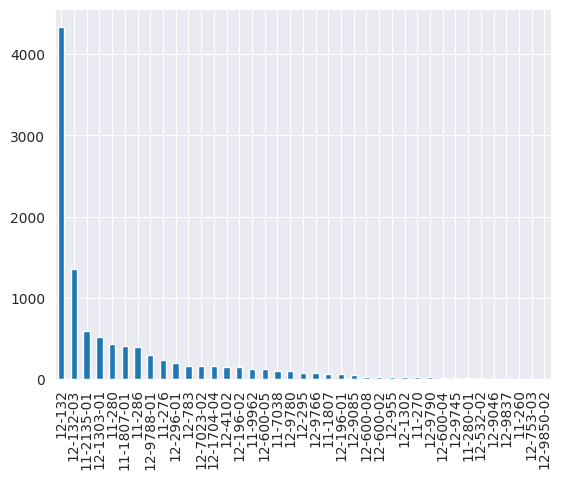

In [104]:
pr_rems.model.value_counts().plot(kind='bar');

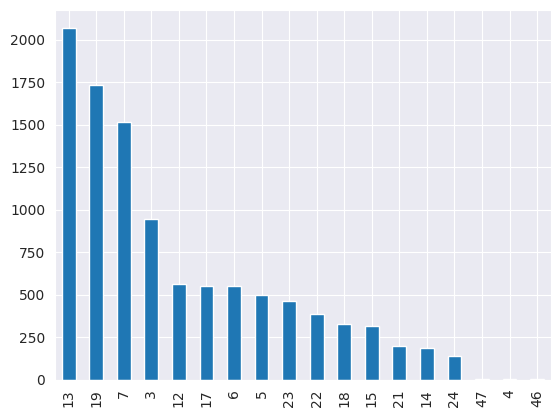

In [106]:
pr_rems.road_id_send.value_counts().plot(kind='bar');

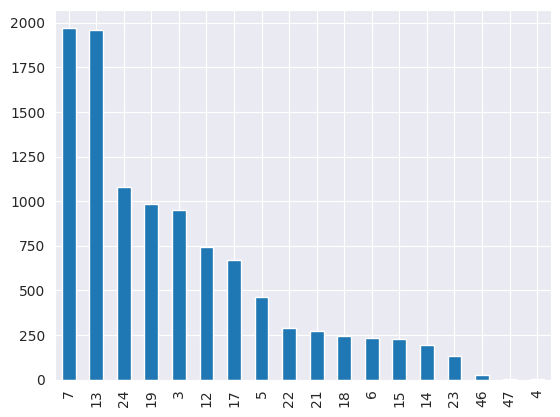

In [110]:
pr_rems.road_id_rem.value_counts().plot(kind='bar');

In [109]:
pr_rems[pr_rems.road_id_send != pr_rems.road_id_rem].shape[0],\
    pr_rems[pr_rems.road_id_send == pr_rems.road_id_rem].shape[0]
# Отличаются / сходятся дороги

(2502, 7939)

In [116]:
pr_rems.st_id_send.value_counts()

6152     1568
4421     1162
4420      593
10016     310
498       266
         ... 
3255        1
9032        1
9540        1
2688        1
12564       1
Name: st_id_send, Length: 911, dtype: Int64

In [117]:
pr_rems.st_id_rem.value_counts()

10364    911
6279     640
4387     586
392      560
4391     487
        ... 
12383      1
4262       1
4253       1
3466       1
1213       1
Name: st_id_rem, Length: 415, dtype: Int64

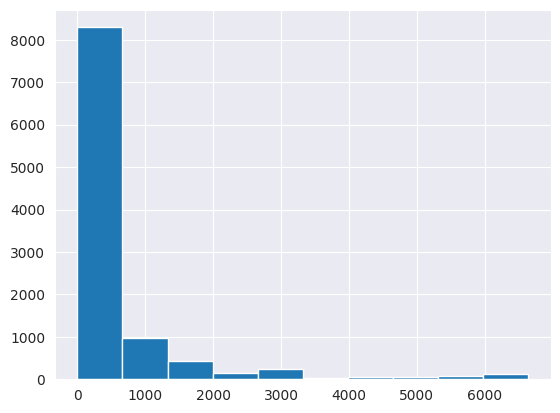

In [140]:
pr_rems.distance.hist();

# Tr_rems

In [141]:
tr_rems

,wagnum,rem_month,kod_vrab,neis1_kod,neis2_kod,neis3_kod,mod1_kod,mod2_kod,mod3_kod,mod4_kod,mod5_kod,mod6_kod,mod7_kod,road_id_send,gr_probeg,por_probeg,st_id_send
0,29938,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,87913,37467,10522
1,29938,2022-08-01,3,14,98,54,7,4,2,0,0,0,0,38,87913,37467,10441
2,29852,2022-08-01,2,0,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
3,29852,2022-08-01,2,36,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
4,13674,2022-08-01,2,95,98,54,7,4,2,0,0,0,0,28,64130,34697,4789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,31868,2023-01-01,3,14,98,54,7,4,2,0,0,0,0,42,88690,60006,11552
7696,22921,2023-01-01,5,0,98,54,7,4,2,0,0,0,0,28,93198,53596,6168
7697,22921,2023-01-01,3,34,95,54,7,4,2,0,0,0,0,28,93198,53596,6168
7698,4978,2023-01-01,3,131,68,54,7,4,2,0,0,0,0,3,72453,38209,262


In [47]:
tr_rems.kod_vrab.value_counts()

3    26538
2    19135
5     2979
Name: kod_vrab, dtype: Int64

In [231]:
tr_rems.neis1_kod.value_counts()

0      24398
2       5654
95      3992
6       3136
88      1792
       ...  
113        1
17         1
91         1
23         1
64         1
Name: neis1_kod, Length: 120, dtype: Int64

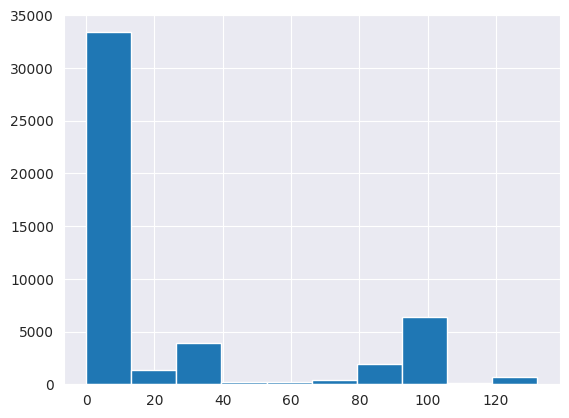

In [232]:
tr_rems.neis1_kod.hist();

In [145]:
tr_rems.wagnum.nunique()

17849

In [221]:
tr_rems.mod2_kod.value_counts()
# mod2 - mod7 -- почти одно значение (или реально только одно)
# mod2 -- больше всего 4
# mod3 -- больше всего 2
# neis2_kod -- больше всего 98, 95, 96, 62
# neis3_kod -- больше всего 54, 51

7    44660
1     2447
4      755
2      525
3      146
6       64
5       54
0        1
Name: mod1_kod, dtype: Int64

In [162]:
tr_rems.dropna(subset=['gr_probeg', 'por_probeg']).wagnum.nunique()
# Довольно мало nan

17672

In [208]:
tr_rems

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
1389,33769,2022-08-02,1,12-132,7,7,0,4420,4387,179,8
147,3996,2022-08-02,0,11-1807-01,15,15,0,7602,7827,473,8
679,24232,2022-08-02,1,12-132,7,7,1,4420,4391,125,8
1434,3919,2022-08-02,0,11-1807-01,6,6,0,3823,3823,409,8
784,3932,2022-08-02,0,11-1807-01,12,12,0,5272,12606,226,8
...,...,...,...,...,...,...,...,...,...,...,...
1287,27183,2023-01-31,1,12-132,6,7,0,4421,12597,739,1
788,25669,2023-01-31,1,12-132-03,13,12,0,5032,12605,858,1
187,28182,2023-01-31,1,12-132-03,19,19,0,10016,10364,217,1
1261,23549,2023-01-31,1,12-132,6,7,1,4420,12597,766,1


In [211]:
after_date = 0
before_date = 0
for wag in tqdm(y_train.wagnum.unique()):
    for month in tr_rems[tr_rems.wagnum == wag].rem_month:
        for ind, now_month in enumerate(y_train[y_train.wagnum == wag].month):
            if y_train[y_train.wagnum == wag].iloc[ind, 2] == 1:
                if str(now_month)[:7] > str(month)[:7]:
                    before_date += 1
                else:
                    after_date += 1

100%|██████████| 33977/33977 [01:50<00:00, 306.26it/s]


In [213]:
before_date, after_date
# tr_rems и предсказания y_train независимы

(7183, 5923)

# Генерация признаков для айдишников без лик

In [214]:
def f(x):
    if x.dropna().shape[0] == 0:
        return x.fillna(0)
    return x.fillna(int(x.dropna().mean()))

,wagnum,rem_month,kod_vrab,neis1_kod,neis2_kod,neis3_kod,mod1_kod,mod2_kod,mod3_kod,mod4_kod,mod5_kod,mod6_kod,mod7_kod,road_id_send,gr_probeg,por_probeg,st_id_send
0,29938,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,87913,37467,10522
6027,19956,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,85569,42821,9753
6026,29113,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,28,77399,40555,6321
6025,29113,2022-08-01,3,36,2,54,7,4,2,0,0,0,0,28,77399,40555,6321
6024,23726,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,20531,15778,10380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,5719,2023-01-01,3,0,98,54,1,4,2,0,0,0,0,42,98308,56779,11464
2557,5719,2023-01-01,3,6,19,51,7,4,2,0,0,0,0,42,98308,56779,11464
2556,14345,2023-01-01,3,0,98,54,7,4,2,0,0,0,0,38,73618,26938,9726
2644,9537,2023-01-01,3,0,98,54,7,4,2,0,0,0,0,15,93646,26318,3735


In [256]:
tr_rems['gr_probeg'] = tr_rems.groupby(['wagnum', 'rem_month'])['gr_probeg'].transform(f)
tr_rems['por_probeg'] = tr_rems.groupby(['wagnum', 'rem_month'])['por_probeg'].transform(f)

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
1389,33769,2022-08-02,1,12-132,7,7,0,4420,4387,179,8
1848,29274,2022-08-02,1,12-132,18,18,1,9189,12647,175,8
1849,22096,2022-08-02,1,12-132,18,17,1,8921,12647,157,8
1850,23969,2022-08-02,1,12-132,18,18,1,9043,12647,19,8
1718,27915,2022-08-02,1,12-132-03,23,24,0,12393,11891,60,8
...,...,...,...,...,...,...,...,...,...,...,...
272,15447,2023-01-31,1,12-132,21,24,0,12393,10951,6094,1
1133,28093,2023-01-31,1,12-132-03,13,13,0,6152,4789,305,1
1115,24541,2023-01-31,1,12-132,13,13,1,6152,4789,348,1
1460,7910,2023-01-31,0,11-286,12,12,0,5352,5310,223,1


In [242]:
tr_data = tr_rems.groupby(['wagnum', 'rem_month']).agg(
    kod_vrab_2_tr=('kod_vrab', lambda x: (x == 2).sum()),
    kod_vrab_3_tr=('kod_vrab', lambda x: (x == 3).sum()),
    kod_vrab_5_tr=('kod_vrab', lambda x: (x == 5).sum()),
    neis1_kod_0_tr=('neis1_kod', lambda x: (x == 0).sum()),
    neis1_kod_2_tr=('neis1_kod', lambda x: (x == 2).sum()),
    neis1_kod_95_tr=('neis1_kod', lambda x: (x == 95).sum()),
    neis1_kod_6_tr=('neis1_kod', lambda x: (x == 6).sum()),
    neis1_kod_88_tr=('neis1_kod', lambda x: (x == 88).sum()),
    neis1_kod_tr_max=('neis1_kod', 'max'),
    neis2_kod_98_tr=('neis2_kod', lambda x: (x == 98).sum()),
    neis2_kod_95_tr=('neis2_kod', lambda x: (x == 95).sum()),
    neis2_kod_96_tr=('neis2_kod', lambda x: (x == 96).sum()),
    neis2_kod_62_tr=('neis2_kod', lambda x: (x == 62).sum()),
    neis2_kod_tr_max=('neis2_kod', 'max'),
    neis3_kod_54_tr=('neis3_kod', lambda x: (x == 54).sum()),
    neis3_kod_51_tr=('neis3_kod', lambda x: (x == 51).sum()),
    neis3_kod_tr_max=('neis3_kod', 'max'),
    mod1_kod_tr_min=('mod1_kod', 'min'),
    mod1_kod_tr_max=('mod1_kod', 'max'),
    mod2_kod_tr_min=('mod2_kod', 'min'),
    mod2_kod_tr_max=('mod2_kod', 'max'),
    gr_probeg_tr_max=('gr_probeg', 'max'),
    gr_probeg_tr_mean=('gr_probeg', 'mean'),
    gr_probeg_tr_min=('gr_probeg', 'min'),
    por_probeg_tr_max=('por_probeg', 'max'),
    por_probeg_tr_mean=('por_probeg', 'mean'),
    por_probeg_tr_min=('por_probeg', 'min'),
    _1m_tr_rems=('rem_month', 'count')
).reset_index().rename(columns={'rem_month': 'month'})

In [ ]:
tr_data['month'] = tr_data.month.apply(lambda x: str(x)[:10])

In [ ]:
'''def g(x):
    print(x)
    for i in range(x.shape[0] - 1, 0, -1):
        if abs(int(str(x.iloc[i, 0])[6:8]) - int(str(x.iloc[i-1, 0])[6:8])) % 11 == 1:
            x.iloc[i, 1] += x.iloc[i-1, 1]
    return x
tr_data['_2m_tr_rems'] = tr_data.groupby('wagnum')[['month', '_1m_tr_rems']].transform(g)
#tr_data['_2m_tr_rems'] = tr_data.groupby('wagnum').agg(aba=g)'''

In [ ]:
pr_rems['month_str'] = pr_rems.rem_month.apply(lambda x: str(x)[:10])
pr_rems['just_month_str'] = pr_rems.month_str.apply(lambda x: x[:-2] + '01')
pr_rems['diff_road'] = (pr_rems.road_id_rem != pr_rems.road_id_send).astype(int)
pr_rems['diff_st'] = (pr_rems.st_id_rem != pr_rems.st_id_send).astype(int)

In [ ]:
pr_data = pr_rems.groupby(['wagnum', 'just_month_str']).agg(
    kod_vrab_0_pr=('kod_vrab', lambda x: (x == 0).sum()),
    kod_vrab_1_pr=('kod_vrab', lambda x: (x == 1).sum()),
    diff_road_pr=('diff_road', 'sum'),
    diff_st_pr=('diff_st', 'sum'),
    _10d_pr_rems=('month_str', lambda x: (x >= x.max()[:-2] + '20').sum()),
    _20d_pr_rems=('month_str', lambda x: (x >= x.max()[:-2] + '10').sum()),
    _1m_pr_rems=('rem_month', 'count'),
    rem_dist_pr_sum=('distance', 'sum'),
    rem_dist_pr_mean=('distance', 'mean'),
).reset_index().rename(columns={'just_month_str': 'month'})

In [246]:
y_test = pd.read_csv('train/target/y_predict_submit_example.csv')
y_test['target_month'] = 0
y_test['target_day'] = 0
y_all = pd.concat([y_train, y_test], ignore_index=True)

wagnum           int64
month           object
target_month     int64
target_day       int64
dtype: object

In [253]:
y_all = y_all.merge(tr_data, on=['wagnum', 'month'], how='left').merge(pr_data, on=['wagnum', 'month'], how='left')

In [249]:
y_all['_allm_pr_rems'] = y_all['_1m_pr_rems'].copy()
y_all['_allm_tr_rems'] = y_all['_1m_tr_rems'].copy()

wagnum            Int64
month            object
kod_vrab_2        Int64
kod_vrab_3        Int64
kod_vrab_5        Int64
neis1_kod_max     Int64
dtype: object

In [255]:
y_all

,wagnum,month,target_month,target_day,kod_vrab_2,kod_vrab_3,kod_vrab_5,neis1_kod_max
0,15844,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>
1,2049,2022-08-01,0,0,0,1,0,14
2,7974,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>
3,931,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>
4,26853,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
203848,18719,2023-01-01,0,0,<NA>,<NA>,<NA>,<NA>
203849,18733,2023-01-01,0,0,<NA>,<NA>,<NA>,<NA>
203850,2563,2023-01-01,0,0,<NA>,<NA>,<NA>,<NA>
203851,2828,2023-01-01,0,0,<NA>,<NA>,<NA>,<NA>


In [106]:
y_all.columns

Index(['wagnum', 'month', 'target_month', 'target_day', 'kod_vrab_2_tr',
       'kod_vrab_3_tr', 'kod_vrab_5_tr', 'neis1_kod_0_tr', 'neis1_kod_2_tr',
       'neis1_kod_95_tr', 'neis1_kod_6_tr', 'neis1_kod_88_tr',
       'neis1_kod_tr_max', 'neis2_kod_98_tr', 'neis2_kod_95_tr',
       'neis2_kod_96_tr', 'neis2_kod_62_tr', 'neis2_kod_tr_max',
       'neis3_kod_54_tr', 'neis3_kod_51_tr', 'neis3_kod_tr_max',
       'mod1_kod_tr_min', 'mod1_kod_tr_max', 'mod2_kod_tr_min',
       'mod2_kod_tr_max', 'gr_probeg_tr_max', 'gr_probeg_tr_mean',
       'gr_probeg_tr_min', 'por_probeg_tr_max', 'por_probeg_tr_mean',
       'por_probeg_tr_min', '_1m_tr_rems', 'kod_vrab_0_pr', 'kod_vrab_1_pr',
       'diff_road_pr', 'diff_st_pr', '_10d_pr_rems', '_20d_pr_rems',
       '_1m_pr_rems', 'rem_dist_pr_sum', 'rem_dist_pr_mean', '_allm_pr_rems',
       '_allm_tr_rems'],
      dtype='object')

In [ ]:
def shift_and_k_nan(k):
    def ff(x):
        x.iloc[1:] = x.iloc[:-1]
        x.iloc[0] = k
        x = x.fillna(k)
        return x
    return ff
ff = shift_and_k_nan(1000)
ff(pd.Series([1, 2, 3, 4, np.nan, 5]))

In [182]:
def shift_and_pref_sum(x):
    x = x.fillna(0)
    x.iloc[1:] = x.iloc[:-1]
    x.iloc[0] = 0
    for i in range(1, x.shape[0]):
        x.iloc[i] += x.iloc[i-1]
    return x
shift_and_pref_sum(pd.Series([1, np.nan, 0, 4, np.nan, 5]))

,min_diff
wagnum,
6327,0
24481,0
29852,0
24439,0
13815,0
...,...
20657,10000
20659,10000
20661,10000


In [179]:
column_to_function = {
    'kod_vrab_2_tr':shift_and_k_nan(0),
    'kod_vrab_3_tr':shift_and_k_nan(0),
    'kod_vrab_5_tr':shift_and_k_nan(0),
    'neis1_kod_0_tr':shift_and_k_nan(0),
    'neis1_kod_2_tr':shift_and_k_nan(0),
    'neis1_kod_95_tr':shift_and_k_nan(0),
    'neis1_kod_6_tr':shift_and_k_nan(0),
    'neis1_kod_88_tr':shift_and_k_nan(0),
    'neis1_kod_tr_max':shift_and_k_nan(-1),
    'neis2_kod_98_tr':shift_and_k_nan(0),
    'neis2_kod_95_tr':shift_and_k_nan(0),
    'neis2_kod_96_tr':shift_and_k_nan(0),
    'neis2_kod_62_tr':shift_and_k_nan(0),
    'neis2_kod_tr_max':shift_and_k_nan(-1),
    'neis3_kod_54_tr':shift_and_k_nan(0),
    'neis3_kod_51_tr':shift_and_k_nan(0),
    'neis3_kod_tr_max':shift_and_k_nan(-1),
    'mod1_kod_tr_min':shift_and_k_nan(-1),
    'mod1_kod_tr_max':shift_and_k_nan(-1),
    'mod2_kod_tr_min':shift_and_k_nan(-1),
    'mod2_kod_tr_max':shift_and_k_nan(-1),
    'gr_probeg_tr_max':shift_and_k_nan(0),
    'gr_probeg_tr_mean':shift_and_k_nan(0),
    'gr_probeg_tr_min':shift_and_k_nan(0),
    'por_probeg_tr_max':shift_and_k_nan(0),
    'por_probeg_tr_mean':shift_and_k_nan(0),
    'por_probeg_tr_min':shift_and_k_nan(0),
    '_1m_tr_rems':shift_and_k_nan(0),
    'kod_vrab_0_pr':shift_and_k_nan(0),
    'kod_vrab_1_pr':shift_and_k_nan(0),
    'diff_road_pr':shift_and_k_nan(0),
    'diff_st_pr':shift_and_k_nan(0),
    '_10d_pr_rems':shift_and_k_nan(0),
    '_20d_pr_rems':shift_and_k_nan(0),
    '_1m_pr_rems':shift_and_k_nan(0),
    'rem_dist_pr_sum':shift_and_k_nan(0),
    'rem_dist_pr_mean':shift_and_k_nan(0),
    '_allm_pr_rems':shift_and_pref_sum,
    '_allm_tr_rems':shift_and_pref_sum,
}

cat_features = []

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
y_all_gr = y_all.groupby('wagnum')
for column, function in tqdm(column_to_function.items()):
    y_all[column] = y_all.groupby('wagnum')[column].transform(function)

In [95]:
y_all

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_0_tr,neis1_kod_2_tr,neis1_kod_95_tr,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,15844,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2049,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,7974,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,931,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,26853,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271263,17621,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
271264,25045,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
271265,27156,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,4.0
271266,21361,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0


In [96]:
end_y_train = y_all[y_all.month != '2023-03-01']

In [107]:
end_y_train

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_0_tr,neis1_kod_2_tr,neis1_kod_95_tr,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,15844,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2049,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,7974,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,931,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,26853,2022-08-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237556,28985,2023-02-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0
237557,24360,2023-02-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,4.0
237558,32421,2023-02-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
237559,32485,2023-02-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [98]:
end_y_test = y_all[y_all.month == '2023-03-01']

In [99]:
end_y_test

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_0_tr,neis1_kod_2_tr,neis1_kod_95_tr,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
237561,33361,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,3.0
237562,33364,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
237563,33366,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
237564,33358,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
237565,33349,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271263,17621,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
271264,25045,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
271265,27156,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,4.0
271266,21361,2023-03-01,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0


In [4]:
train = pd.read_csv('train/data/train.csv')
test = pd.read_csv('train/data/test.csv')

/tmp/ipykernel_149519/20718447.py:1: DtypeWarning: Columns (64,85) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train/data/train.csv')
/tmp/ipykernel_149519/20718447.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('train/data/test.csv')


In [123]:
train = train.merge(end_y_train.drop(columns=['target_month', 'target_day']), on=['wagnum', 'month'])
test = test.merge(end_y_test.drop(columns=['target_month', 'target_day']), on=['wagnum', 'month'])

In [5]:
features = [
    'wagnum', 'month', 'target_month', 'target_day', 'kod_vrab_2_tr',
     'kod_vrab_3_tr', 'kod_vrab_5_tr', 'neis1_kod_0_tr', 'neis1_kod_2_tr',
     'neis1_kod_95_tr', 'neis1_kod_6_tr', 'neis1_kod_88_tr',
     'neis1_kod_tr_max', 'neis2_kod_98_tr', 'neis2_kod_95_tr',
     'neis2_kod_96_tr', 'neis2_kod_62_tr', 'neis2_kod_tr_max',
     'neis3_kod_54_tr', 'neis3_kod_51_tr', 'neis3_kod_tr_max',
     'mod1_kod_tr_min', 'mod1_kod_tr_max', 'mod2_kod_tr_min',
     'mod2_kod_tr_max', 'gr_probeg_tr_max', 'gr_probeg_tr_mean',
     'gr_probeg_tr_min', 'por_probeg_tr_max', 'por_probeg_tr_mean',
     'por_probeg_tr_min', '_1m_tr_rems', 'kod_vrab_0_pr', 'kod_vrab_1_pr',
     'diff_road_pr', 'diff_st_pr', '_10d_pr_rems', '_20d_pr_rems',
     '_1m_pr_rems', 'rem_dist_pr_sum', 'rem_dist_pr_mean', '_allm_pr_rems',
     '_allm_tr_rems'
]

In [6]:
train = train[features]
test = test[features]

In [124]:
train

,wagnum,month,target_month,target_day,5d_another_road_max,5d_naliv_mean,5d_ost_prob_min,60d_nasip_mean,30d_nasip_mean,5d_skoroport_mean,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,0,2022-08-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1,2022-08-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2,2022-08-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,3,2022-08-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,4,2022-08-01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237556,33972,2023-02-01,0,0,1.0,0.0,141459.0,0.650000,0.500000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
237557,33973,2023-02-01,0,0,1.0,0.0,135756.0,0.633333,0.800000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
237558,33974,2023-02-01,0,0,1.0,0.0,148203.0,0.583333,0.500000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
237559,33975,2023-02-01,0,0,0.0,0.0,148660.0,0.883333,0.766667,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0


In [126]:
test

,wagnum,month,target_month,target_day,5d_another_road_max,5d_naliv_mean,5d_ost_prob_min,60d_nasip_mean,30d_nasip_mean,5d_skoroport_mean,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,0,2023-03-01,NaN,NaN,1.0,0.0,41969.0,0.000000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
1,1,2023-03-01,NaN,NaN,0.0,0.0,83058.0,0.000000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2,2023-03-01,NaN,NaN,0.0,0.0,50236.0,0.300000,0.466667,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,4.0
3,3,2023-03-01,NaN,NaN,0.0,0.0,52596.0,0.000000,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
4,4,2023-03-01,NaN,NaN,0.0,0.0,87594.0,0.216667,0.433333,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33702,33972,2023-03-01,NaN,NaN,0.0,0.0,137520.0,0.483333,0.400000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
33703,33973,2023-03-01,NaN,NaN,1.0,0.0,122657.0,0.766667,0.666667,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
33704,33974,2023-03-01,NaN,NaN,1.0,0.0,140235.0,0.433333,0.300000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
33705,33975,2023-03-01,NaN,NaN,1.0,0.0,146257.0,0.550000,0.266667,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0


In [127]:
train.to_csv('../train2.csv', index=False)
test.to_csv('../test2.csv', index=False)